Restarted deepof (Python 3.10.16)

2025-04-20 13:14:09.705886: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 13:14:10.274246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-20 13:14:10.274299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-20 13:14:10.369091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-20 13:14:10.564320: I tensorflow/core/platform/cpu_feature_guar


Searching for the newest unsupervised results pickle file in: /mnt/d/Project/DeepOF/deepof_project/Results
Found newest file: unsupervised_results_VaDE_recurrent_k10_enc6_ws25_20250419-152437.pkl

Loading unsupervised results from /mnt/d/Project/DeepOF/deepof_project/Results/unsupervised_results_VaDE_recurrent_k10_enc6_ws25_20250419-152437.pkl...
Results loaded successfully.


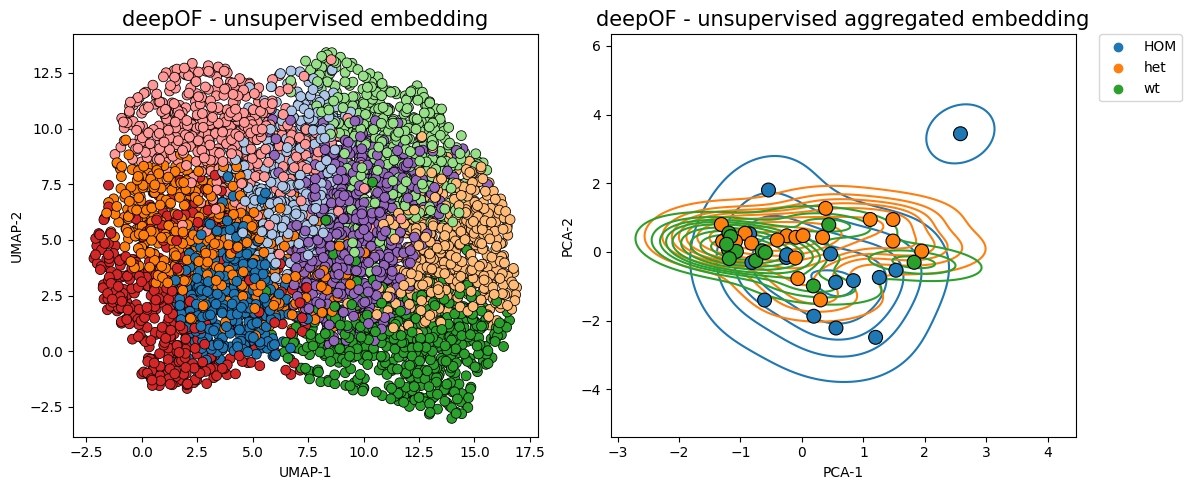

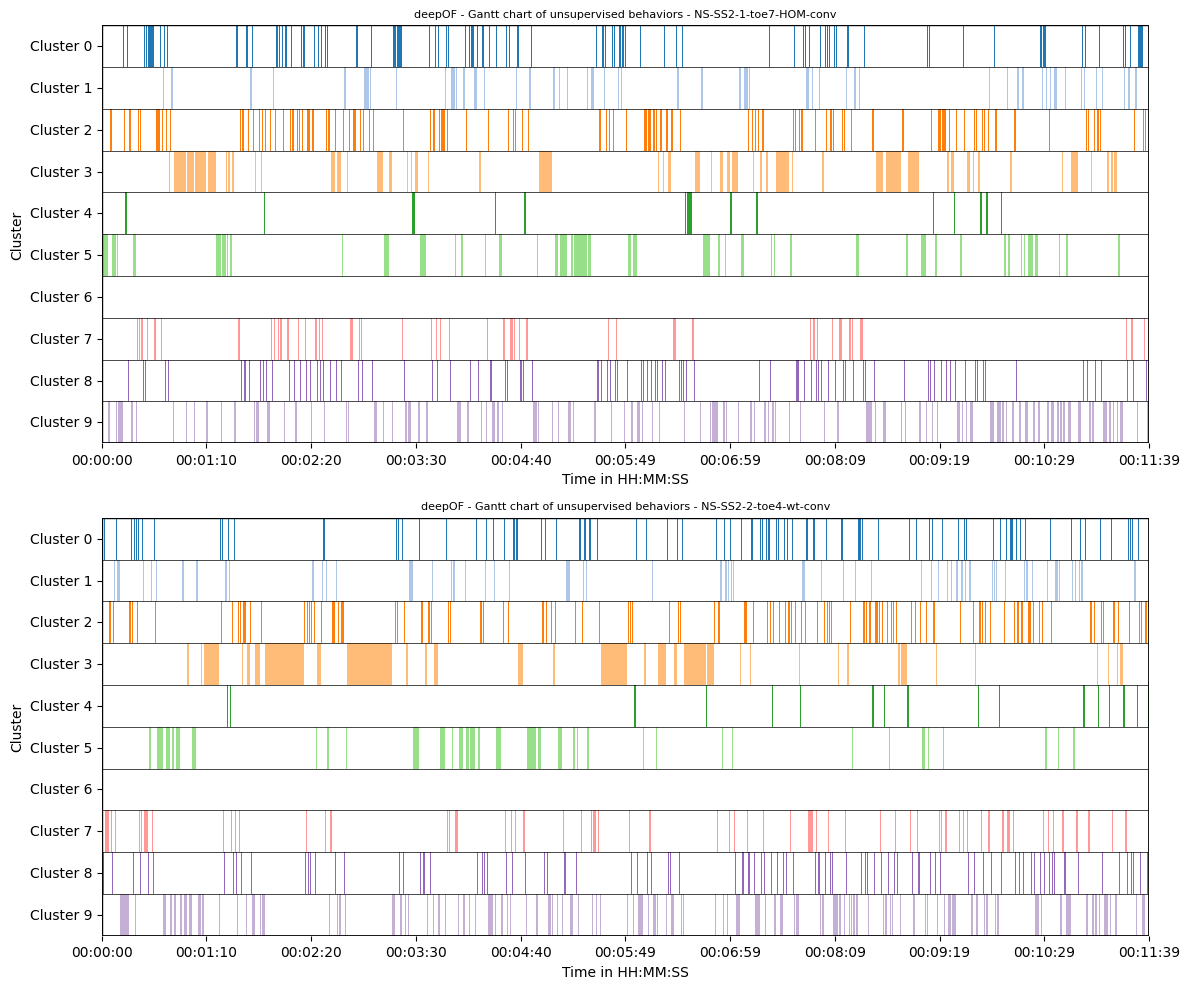

Found an optimal_bin at 439 seconds


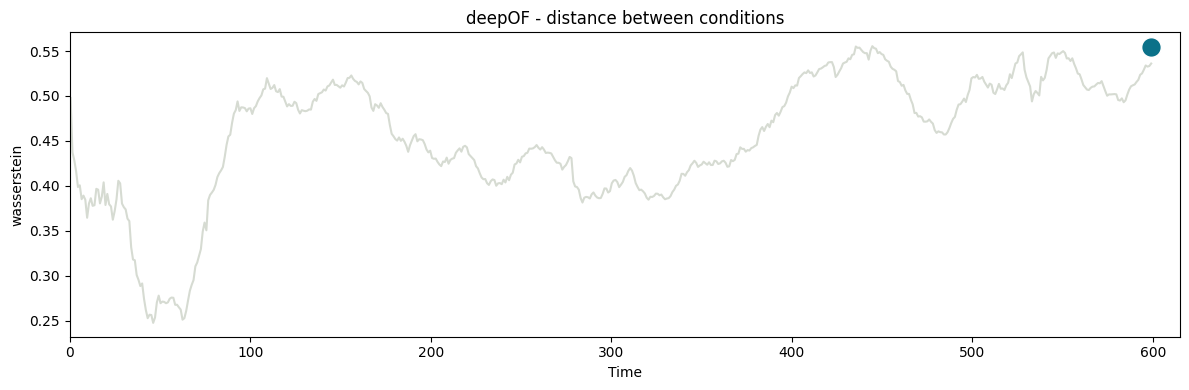

In [ ]:
import os
import deepof.data
import pickle
import tensorflow as tf
from IPython import display
from networkx import draw
import deepof.visuals
import matplotlib.pyplot as plt

project_path = os.path.join("/mnt", "d", "Project", "DeepOF", "deepof_project")
results_dir = os.path.join(project_path, "Results") # Define results directory path
conditions_path = os.path.join(project_path, "conditions.csv")
my_deepof_project = deepof.data.load_project(project_path)
my_deepof_project.load_exp_conditions(conditions_path)

# --- Configuration ---
# Define the path to the saved pickle file (make sure the name matches the one saved)
pickle_path = None
newest_pickle_filename = None

print(f"\nSearching for the newest unsupervised results pickle file in: {results_dir}")
try:
    if not os.path.isdir(results_dir):
        raise FileNotFoundError(f"Results directory not found: {results_dir}")

    # Find all .pkl files matching the expected pattern (adjust if needed)
    potential_files = [
        f for f in os.listdir(results_dir)
        if f.startswith("unsupervised_results_") and f.endswith(".pkl")
    ]

    if not potential_files:
        raise FileNotFoundError(f"No 'unsupervised_results_*.pkl' files found in {results_dir}")

    # Find the newest file based on modification time
    # We create full paths here to ensure getmtime works correctly, especially if the script
    # is run from a different working directory.
    newest_pickle_filename = max(
        potential_files,
        key=lambda f: os.path.getmtime(os.path.join(results_dir, f))
    )
    pickle_path = os.path.join(results_dir, newest_pickle_filename)
    print(f"Found newest file: {newest_pickle_filename}")

except FileNotFoundError as e:
    print(f"Error finding pickle file: {e}")
    print("Make sure 'unsupervised.py' was run successfully and saved a results file.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while searching for the pickle file: {e}")
    exit()

# --- Load Data from Pickle ---
print(f"\nLoading unsupervised results from {pickle_path}...")
with open(pickle_path, 'rb') as f:
    loaded_data = pickle.load(f)
print("Results loaded successfully.")

# Extract data from the loaded dictionary
embeddings = loaded_data['embeddings']
soft_counts = loaded_data['soft_counts']

#UMAP clustering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    aggregate_experiments=None,
    samples=100,
    colour_by="cluster",
    ax=ax1,
    save=False,  # Set to True, or give a custom name, to save the plot
)
deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    aggregate_experiments="time on cluster",  # Can also be set to 'mean' and 'median'
    exp_condition="SS2",
    show_aggregated_density=True,
    ax=ax2,
    save=False,  # Set to True, or give a custom name, to save the plot,
)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()
plt.show()

#Gantt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
deepof.visuals.plot_gantt(
    my_deepof_project,
    soft_counts=soft_counts,
    instance_id="NS-SS2-1-toe7-HOM-conv",
    ax=ax1,
)
deepof.visuals.plot_gantt(
    my_deepof_project,
    soft_counts=soft_counts,
    instance_id="NS-SS2-2-toe4-wt-conv",
    ax=ax2,
)
plt.tight_layout()
plt.show()

#Global separation 
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
deepof.visuals.plot_distance_between_conditions(
    my_deepof_project,
    embeddings,
    soft_counts,
    "SS2binW",
    distance_metric="wasserstein",
    n_jobs=1,
)
plt.show()


In [ ]:
binsize = input("Optimal bin:")
import re
binsize = int(re.sub('\D', '', binsize))

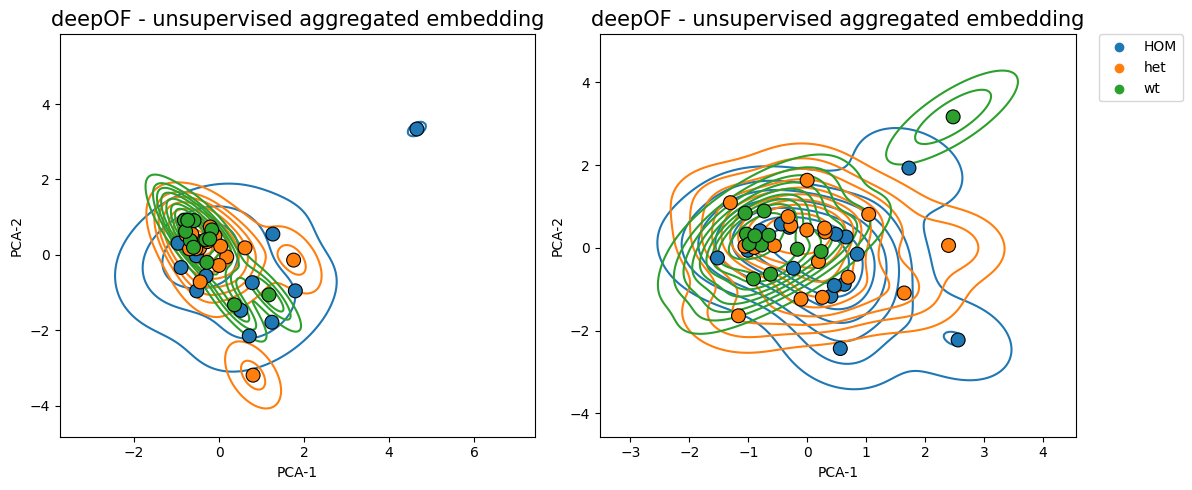

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    aggregate_experiments="time on cluster",
    bin_size=binsize, # This parameter controls the size of the time bins. We set it to match the optimum reported above
    bin_index=0, # This parameter controls the index of the bins to select, we take the first one here
    ax=ax1,
)
deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    aggregate_experiments="time on cluster",
    exp_condition="SS2",
    show_aggregated_density=True,
    bin_size=binsize, # This parameter controls the size of the time bins. We set it to match the optimum reported above
    bin_index=3, # This parameter controls the index of the bins to select, we take the fourth one here
    ax=ax2,
)
ax2.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0
)
ax1.legend().remove()
plt.tight_layout()
plt.show()

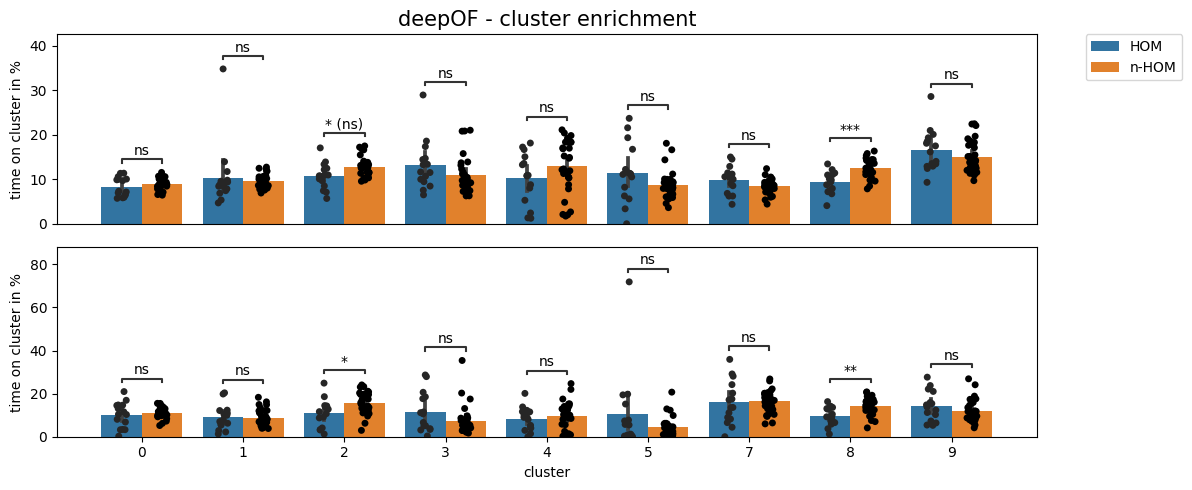

In [ ]:
#Cluster enrichment
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 5))
deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    normalize=True,
    add_stats="Mann-Whitney",
    exp_condition="SS2binH",
    verbose=False,
    ax=ax,
)
deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    normalize=True,
    bin_size=binsize,
    bin_index=0,
    add_stats="Mann-Whitney",
    exp_condition="SS2binH",
    verbose=False,
    ax=ax2,
)
ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
ax.set_xlabel("")
ax2.legend().remove()
plt.title("")
plt.tight_layout()
plt.show()

invalid value encountered in divide


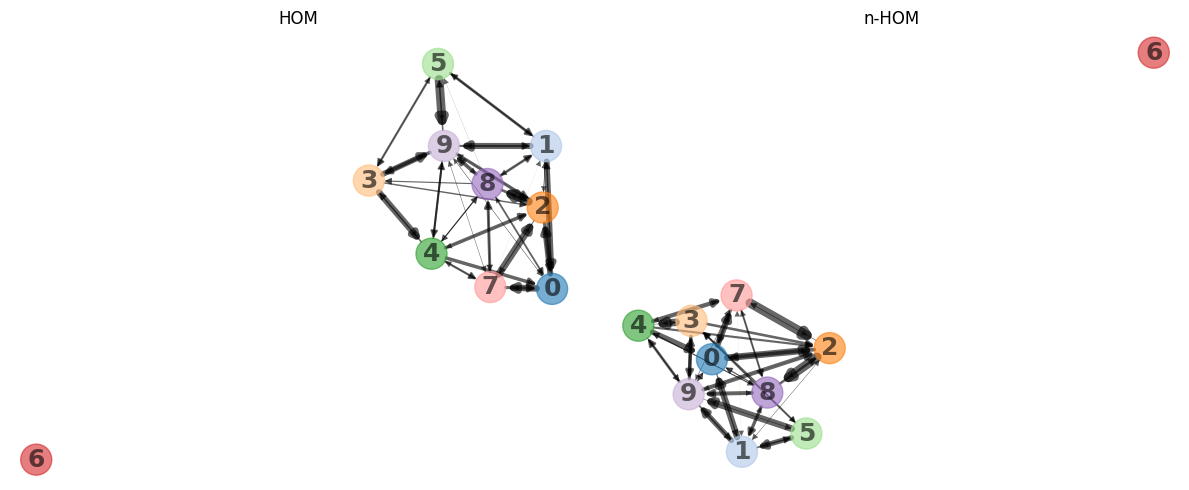

In [ ]:
#Cluster transition
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
deepof.visuals.plot_transitions(
    my_deepof_project,
    embeddings.filter_videos(my_deepof_project.get_exp_conditions.keys()),
    soft_counts.filter_videos(my_deepof_project.get_exp_conditions.keys()),
    visualization="networks",
    silence_diagonal=True,
    bin_size=binsize,
    bin_index=0,
    exp_condition="SS2binH",
    ax=axes,
)
plt.tight_layout()
plt.show()

invalid value encountered in divide


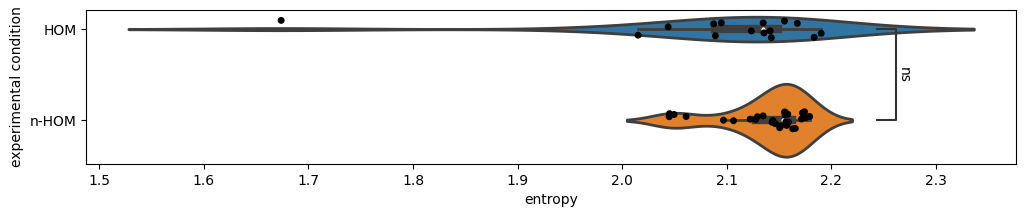

In [ ]:
# Entropy plots
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
deepof.visuals.plot_stationary_entropy(
    my_deepof_project,
    embeddings,
    soft_counts,
    exp_condition="SS2binH",
    ax=ax,
)

In [ ]:
#Cluster visualization
video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embeddings=embeddings,
    soft_counts=soft_counts,
    experiment_id="NS-SS2-1-toe7-HOM-conv",
    bin_index=0,
    bin_size=10,
    sampling_rate=15,
    selected_cluster=2,
    dpi=60,
    center="arena",
)
html = display.HTML(video)
display.display(html)
plt.close()

The figure layout has changed to tight


No kernel connected

No kernel connected

Connected to deepof (Python 3.10.16)

In [1]:
import os
import re
import deepof.data
import pickle
from IPython import display
from networkx import draw 
import deepof.visuals
import matplotlib.pyplot as plt

project_path = os.path.join("/mnt", "d", "Project", "DeepOF", "deepof_project")
results_dir = os.path.join(project_path, "Results") # Define results directory path
conditions_path = os.path.join(project_path, "conditions.csv")
my_deepof_project = deepof.data.load_project(project_path)
my_deepof_project.load_exp_conditions(conditions_path)

# --- Configuration ---
# Define the path to the saved pickle file (make sure the name matches the one saved)
pickle_path = None
newest_pickle_filename = None

print(f"\nSearching for the newest unsupervised results pickle file in: {results_dir}")
try:
    if not os.path.isdir(results_dir):
        raise FileNotFoundError(f"Results directory not found: {results_dir}")

    # Find all .pkl files matching the expected pattern (adjust if needed)
    potential_files = [
        f for f in os.listdir(results_dir)
        if f.startswith("unsupervised_results_") and f.endswith(".pkl")
    ]

    if not potential_files:
        raise FileNotFoundError(f"No 'unsupervised_results_*.pkl' files found in {results_dir}")

    # Find the newest file based on modification time
    # We create full paths here to ensure getmtime works correctly, especially if the script
    # is run from a different working directory.
    newest_pickle_filename = max(
        potential_files,
        key=lambda f: os.path.getmtime(os.path.join(results_dir, f))
    )
    pickle_path = os.path.join(results_dir, newest_pickle_filename)
    print(f"Found newest file: {newest_pickle_filename}")

except FileNotFoundError as e:
    print(f"Error finding pickle file: {e}")
    print("Make sure 'unsupervised.py' was run successfully and saved a results file.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while searching for the pickle file: {e}")
    exit()

# --- Load Data from Pickle ---
print(f"\nLoading unsupervised results from {pickle_path}...")
with open(pickle_path, 'rb') as f:
    loaded_data = pickle.load(f)
print("Results loaded successfully.")

# Extract data from the loaded dictionary
embeddings = loaded_data['embeddings']
soft_counts = loaded_data['soft_counts']

2025-04-23 16:59:33.613920: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-23 16:59:33.642912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-23 16:59:33.642947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-23 16:59:33.643668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-23 16:59:33.648782: I tensorflow/core/platform/cpu_feature_guar


Searching for the newest unsupervised results pickle file in: /mnt/d/Project/DeepOF/deepof_project/Results
Found newest file: unsupervised_results_VaDE_recurrent_k10_enc6_ws25_20250419-152437.pkl

Loading unsupervised results from /mnt/d/Project/DeepOF/deepof_project/Results/unsupervised_results_VaDE_recurrent_k10_enc6_ws25_20250419-152437.pkl...
Results loaded successfully.


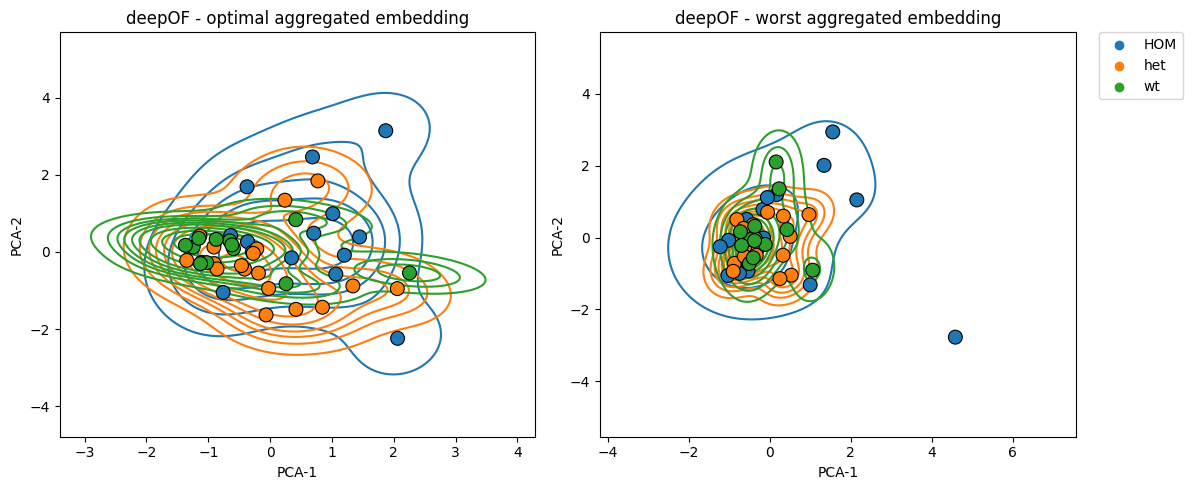

In [2]:

best_binsize = input("Optimal bin:")
best_binsize = int(re.sub('\D', '', best_binsize))
worst_binsize = input("Worst bin:")
worst_binsize = int(re.sub('\D', '', worst_binsize))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    aggregate_experiments="time on cluster",
    bin_size=best_binsize, # This parameter controls the size of the time bins. We set it to match the optimum reported above
    bin_index=0, # This parameter controls the index of the bins to select, we take the first one here
    ax=ax1,
)
deepof.visuals.plot_embeddings(
    my_deepof_project,
    embeddings,
    soft_counts,
    aggregate_experiments="time on cluster",
    exp_condition="SS2",
    show_aggregated_density=True,
    bin_size=worst_binsize, # This parameter controls the size of the time bins. We set it to match the optimum reported above
    bin_index=0, # This parameter controls the index of the bins to select, we take the fourth one here
    ax=ax2,
)
ax2.legend(
    bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0
)
ax1.legend().remove()
ax1.set_title('deepOF - optimal aggregated embedding')
ax2.set_title('deepOF - worst aggregated embedding')
plt.tight_layout()
plt.show()

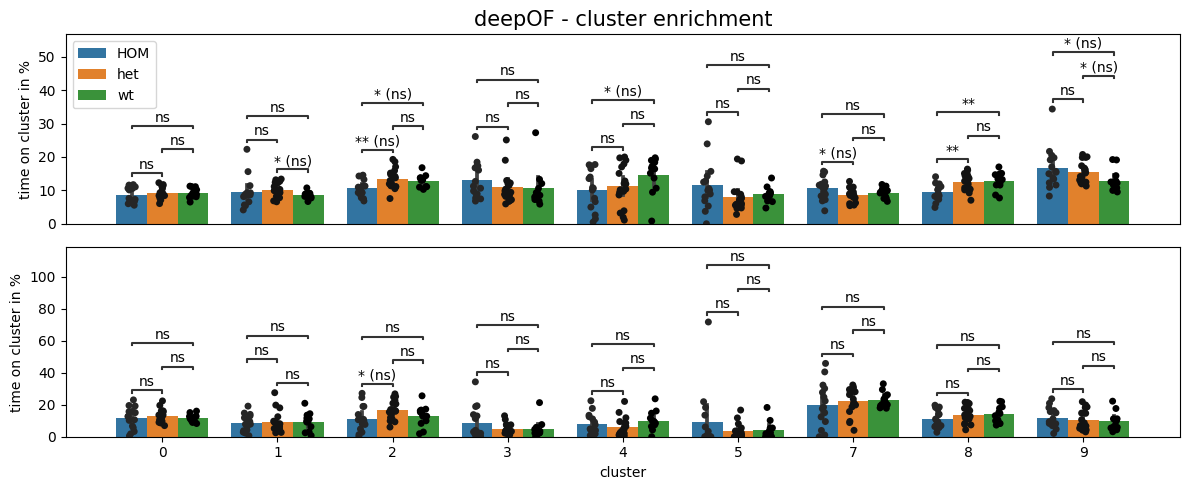

In [9]:
#Cluster enrichment
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 5))
deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    normalize=True,
    bin_size=best_binsize,
    bin_index=0,
    add_stats="Kruskal",#"Mann-Whitney for dual-conditional comparison",
    exp_condition="SS2",
    verbose=False,
    ax=ax,
)
deepof.visuals.plot_enrichment(
    my_deepof_project,
    embeddings,
    soft_counts,
    normalize=True,
    bin_size=worst_binsize,
    bin_index=0,
    add_stats="Kruskal",#"Mann-Whitney for dual-conditional comparison",
    exp_condition="SS2",
    verbose=False,
    ax=ax2,
)
ax.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
ax.set_xlabel("")
ax2.legend().remove()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:6], labels[3:6])
plt.title("")
plt.tight_layout()
plt.show()


In [12]:
#Cluster visualization
video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embeddings=embeddings,
    soft_counts=soft_counts,
    experiment_id="NS-SS2-2-toe1-HOM-conv",
    bin_index=0,
    bin_size=5,
    sampling_rate=25,
    selected_cluster=8,
    dpi=60,
    center="arena",
)
html = display.HTML(video)
display.display(html)
plt.close()

The figure layout has changed to tight


invalid value encountered in divide


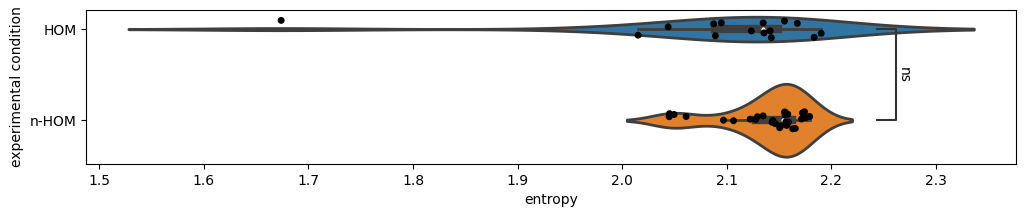

In [11]:

# Entropy plots
fig, ax = plt.subplots(1, 1, figsize=(12, 2))
deepof.visuals.plot_stationary_entropy(
    my_deepof_project,
    embeddings,
    soft_counts,
    exp_condition="SS2binH",
    ax=ax,
)


In [13]:
#Cluster visualization
video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embeddings=embeddings,
    soft_counts=soft_counts,
    experiment_id="20250117-OFT-test8-toe1-con-conv",
    bin_index=0,
    bin_size=5,
    sampling_rate=25,
    selected_cluster=8,
    dpi=60,
    center="arena",
)
html = display.HTML(video)
display.display(html)
plt.close()

The figure layout has changed to tight


In [12]:
#Cluster visualization
video = deepof.visuals.animate_skeleton(
    my_deepof_project,
    embeddings=embeddings,
    soft_counts=soft_counts,
    experiment_id="20250117-OFT-test8-toe1-con-conv",
    bin_index=3,
    bin_size=5,
    sampling_rate=25,
    selected_cluster=0,
    dpi=60,
    center="arena",
)
html = display.HTML(video)
display.display(html)
plt.close()

The figure layout has changed to tight
